<a href="https://colab.research.google.com/github/b-vaibhaw/ML_Algorithms/blob/main/Random_Forest_Classifier(1_car).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [ ]:
data = './car.data'

df = pd.read_csv(data, header=None)

In [ ]:
df.shape

(1728, 7)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
X = df.drop(['class'], axis=1)
Y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((1123, 6), (605, 6))

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
629,high,high,5more,2,big,high
906,med,vhigh,3,4,big,low
1647,low,low,3,2,small,low
296,vhigh,med,4,more,big,high
694,high,med,3,more,small,med


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
629,1,1,1,1,1,1
906,2,2,2,2,1,2
1647,3,3,2,1,2,2
296,4,4,3,3,1,1
694,1,4,2,3,2,3


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,1,1,3,1,3,1
1201,2,3,4,2,3,3
628,1,1,1,1,1,3
1498,3,1,1,2,3,3
1263,2,3,3,3,3,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=0)

In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9570


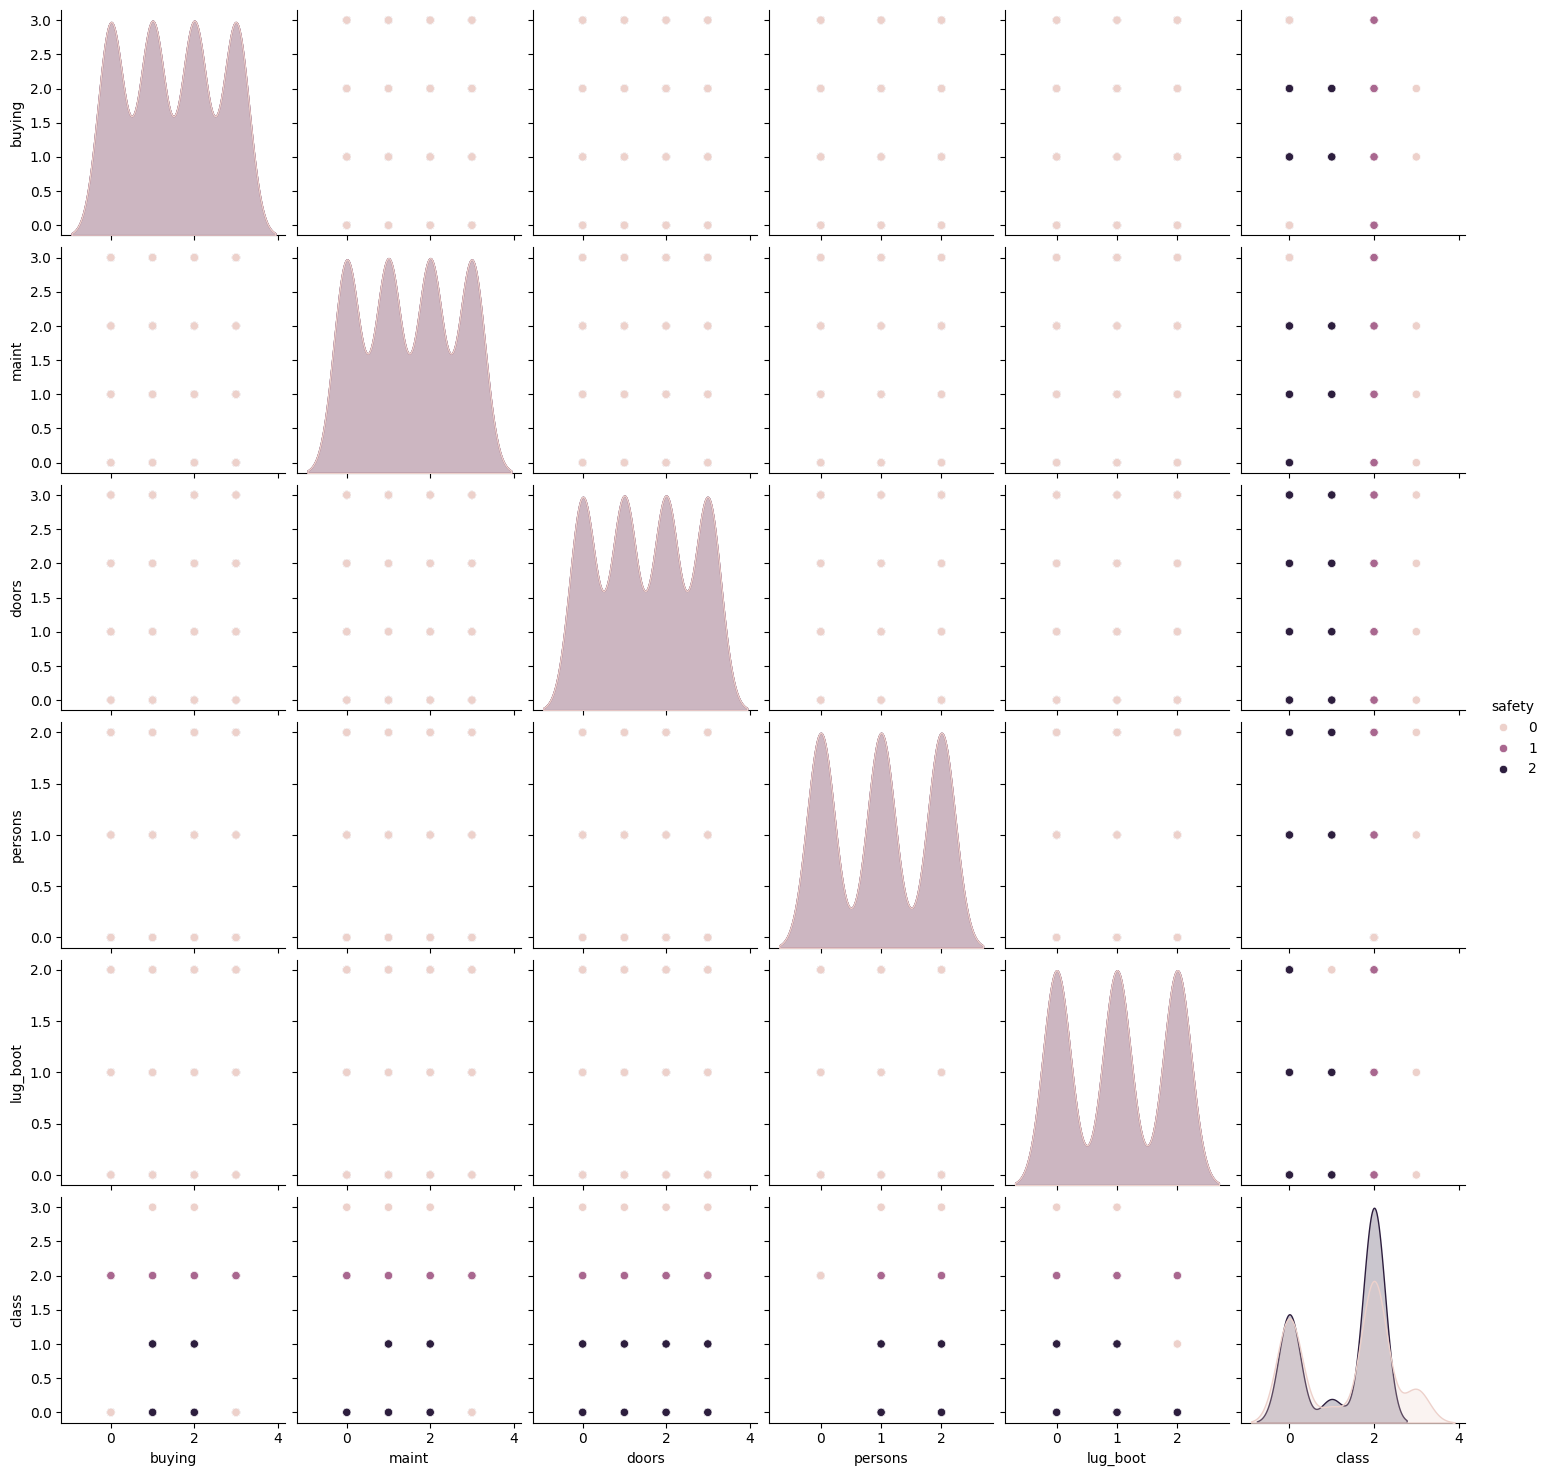

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
sns.pairplot(df , hue= 'safety')

In [ ]:
rfc_58 = RandomForestClassifier(n_estimators=58, random_state=0)
rfc_58.fit(X_train, y_train)
y_pred_58 = rfc_58.predict(X_test)
print('Model accuracy for 58 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_58)))

Model accuracy for 58 decision-trees : 0.9504


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[122   5   9   1]
 [  2  19   0   1]
 [  5   0 416   0]
 [  3   0   0  22]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.92      0.89      0.91       137
        good       0.79      0.86      0.83        22
       unacc       0.98      0.99      0.98       421
       vgood       0.92      0.88      0.90        25

    accuracy                           0.96       605
   macro avg       0.90      0.91      0.90       605
weighted avg       0.96      0.96      0.96       605

